In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json

In [8]:
from classifier import lib_mfcc

In [ ]:
mfcc_1 = lib_mfcc(".\..\dataset\clips\common_voice_uk_23734172.mp3")
mfcc_2 = lib_mfcc(".\..\dataset\clips\common_voice_uk_21569628.mp3")

(267, 13)


array([[-3.9617987e+02,  8.7499359e+01, -1.0893247e+01, ...,
        -4.8213487e+00, -5.8521795e+00, -8.2349720e+00],
       [-3.8091968e+02,  7.6092491e+01, -6.5110207e+00, ...,
        -3.7300944e+00, -5.5065651e+00, -1.8594582e+00],
       [-3.8601599e+02,  9.3522011e+01, -3.4948933e+00, ...,
        -5.6838751e+00, -5.6174774e+00, -6.6069050e+00],
       ...,
       [-3.9829321e+02,  1.5363660e+02,  2.6279602e+01, ...,
         6.5412259e+00, -9.2212400e+00, -1.1833580e+01],
       [-4.2325598e+02,  1.2876212e+02,  2.0849245e+01, ...,
         8.7937508e+00, -1.0101200e+01, -5.5607409e+00],
       [-3.8513452e+02,  9.4678314e+01,  1.0962074e+01, ...,
        -1.2102262e+00,  2.1692669e-01, -5.8662477e+00]], dtype=float32)

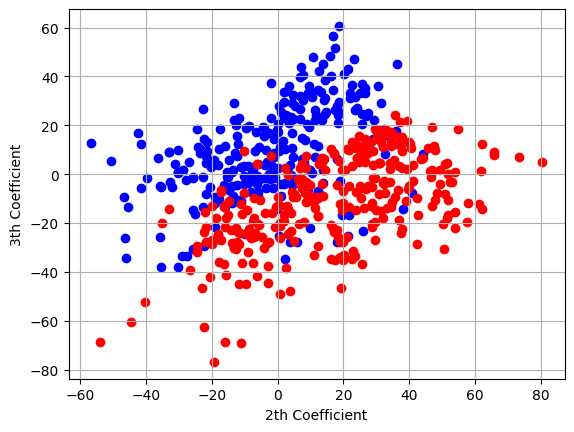

In [ ]:
plt.cla()
c_1 = 4
c_2 = 5

coeff_5_1 = mfcc_1[:, c_1]
coeff_6_1 = mfcc_1[:, c_2]

coeff_5_2 = mfcc_2[:, c_1]
coeff_6_2 = mfcc_2[:, c_2]

plt.scatter(coeff_5_1, coeff_6_1, color='blue')
plt.scatter(coeff_5_2, coeff_6_2, color='red') 
plt.xlabel('3th Coefficient')
plt.ylabel('4th Coefficient')
# plt.title('Scatter Plot of 2th and 3th Coefficients')
plt.grid(True)
plt.show()



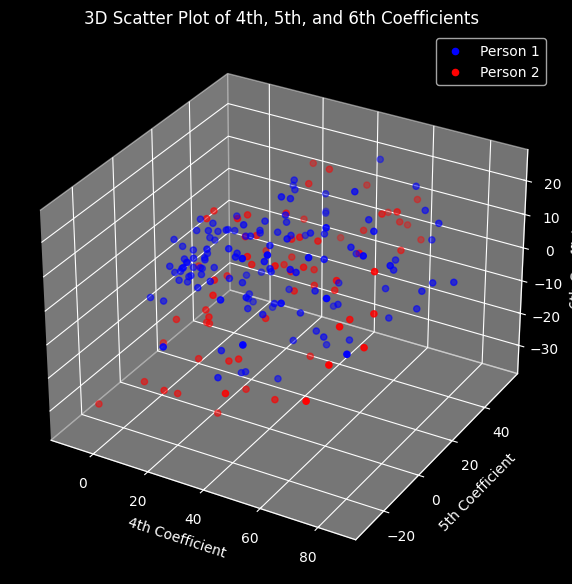

In [ ]:
coeff_5_1 = mfcc_1[:, 3]
coeff_6_1 = mfcc_1[:, 4]
coeff_7_1 = mfcc_1[:, 5]

coeff_5_2 = mfcc_2[:, 3]
coeff_6_2 = mfcc_2[:, 4]
coeff_7_2 = mfcc_2[:, 5]

fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coeff_5_1, coeff_6_1, coeff_7_1,color='blue', label='Person 1')
ax.scatter(coeff_5_2, coeff_6_2, coeff_7_2, color='red', label='Person 2')
ax.set_xlabel('4th Coefficient')
ax.set_ylabel('5th Coefficient')
ax.set_zlabel('6th Coefficient')
ax.set_title('3D Scatter Plot of 4th, 5th, and 6th Coefficients')
plt.legend()
plt.show()

{'k=20, win_size=100, train=8, test=2': {'right': [0.463, 0.291, 0.385, 0.812, 0.52, 0.5, 0.556, 0.276, 0.424, 0.239, 0.28, 0.417, 0.17, 0.27, 0.257, 0.346, 0.516, 0.462, 0.611, 0.526, 0.161, 0.389, 0.609, 0.46, 0.586, 0.362, 0.333, 0.842, 0.727, 0.554, 0.547, 0.208, 0.277, 0.704, 0.4, 0.875, 0.92, 0.176, 0.447, 0.347, 0.247, 0.579, 0.429, 0.355, 0.194, 0.236, 0.231, 0.271, 0.267, 0.311, 0.476, 0.295, 0.714, 0.604, 0.353, 0.451, 0.559, 0.379, 0.571, 0.634, 0.222, 0.345, 0.359, 0.698, 0.75, 0.233, 0.318, 0.275, 0.411, 0.302, 0.219, 0.174, 0.375, 0.321, 0.355, 0.212, 0.545, 0.739, 0.278, 0.471], 'wrong': [0.429, 0.17, 0.231, 0.156, 0.188, 0.3, 0.25, 0.154, 0.25, 0.163, 0.188, 0.176, 0.167, 0.259, 0.194, 0.35, 0.118, 0.152, 0.147, 0.129]}}


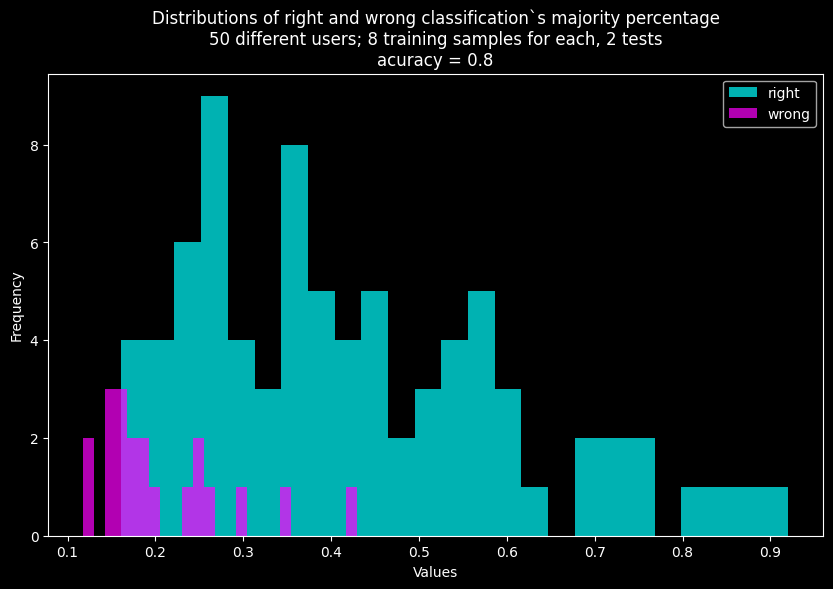

In [24]:
data = {}
with open("./../results/testing/sex_None_users_50_results.json", "r", encoding="utf-8") as f:
    data = json.load(f)
plt.style.use('dark_background')
print(data)
accuracy = round(len(data["k=20, win_size=100, train=8, test=2"]["right"])/(len(data["k=20, win_size=100, train=8, test=2"]["wrong"]) + len(data["k=20, win_size=100, train=8, test=2"]["right"])), 2)
plt.figure(figsize=(10, 6))

plt.hist(data["k=20, win_size=100, train=8, test=2"]["right"], bins=25, alpha=0.7, color='cyan', label='right')

plt.hist(data["k=20, win_size=100, train=8, test=2"]["wrong"], bins=25, alpha=0.7, color='magenta', label='wrong')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Distributions of right and wrong classification`s majority percentage\n50 different users; 8 training samples for each, 2 tests\nacuracy = {accuracy}')
plt.legend(loc='upper right')
plt.show()

In [12]:
import re

In [13]:
def plot_grid(results, title):
    data = {}
    pattern = r'=(\d+),'
    for key, val in results.items():
        number = re.findall(pattern, key)[:-1]
        data[(int(number[0]), int(number[1]))] = len(val["right"])/20

    x_values = [key[0] for key in data.keys()]
    y_values = [key[1] for key in data.keys()]
    x_unique = np.unique(x_values)
    y_unique = np.unique(y_values)
    z_matrix = np.zeros((len(y_unique), len(x_unique)))

    for i, x in enumerate(x_unique):
        for j, y in enumerate(y_unique):
            z_matrix[j, i] = data.get((x, y), np.nan)

    plt.figure(figsize=(8, 6))
    plt.imshow(z_matrix, extent=[min(x_values), max(x_values), min(y_values), max(y_values)],
            aspect='auto', cmap='Greens')
    plt.colorbar(label='Value')
    plt.xlabel('K in classifier')
    plt.ylabel('Window size / ms')
    plt.title(title)
    plt.grid(True)
    plt.show()

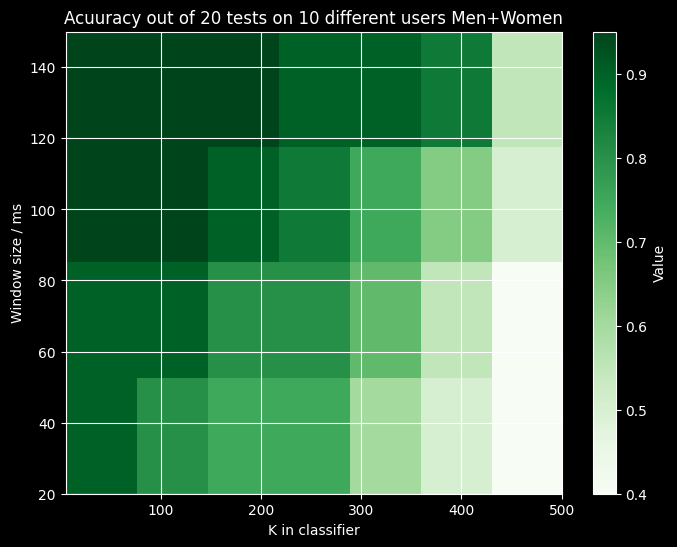

In [15]:
results = {}
with open("./../results/validation_1/sex_None_users_10_results.json", "r", encoding="utf-8") as f:
    results = json.load(f)
plt.style.use('dark_background')
plot_grid(results, title = "Acuuracy out of 20 tests on 10 different users Men+Women")